# Predicting Heart Disease using Exploratory Data Analysis and Machine Learning Methods in the UCI Heart Disease Data Set

The goal of this data science work is to explore the UCI - Heart Disease Data Set to discover
trends in the data and predict whether a patient would have heart disease based on
medical attributes.

This notebook shows all the process used with justification for why each techique is selected.

The dataset has 303 instances (rows, or data points) and 14 attributes (columns, or properties) that are a combination of categorical and real values (numerical data), which provides room for experimentation with different models and approaches to data pre-processing. Some models can be applied well with deciding how to classify a data point, while others are good at predicting a value.

There are 61 other relevant papers that make use of this dataset as identified by UCI website.

# Related Previous Work

We begin our work by understanding the context of the data and the any previous research that exists related to the topic or the dataset. With publically available datasets, there is typically available work that we can compare results and methodology with.

Several research works have been completed to predict heart disease using UCI Cleveland heart disease dataset with the help of machine learning classification algorithms. This section provides a sample of the approach used by others and the results obtained. Research work was not reviewed during the development of this project so as not to introduce bias in the approach used.

- Sharma et al. [1] used Naive Bayes, Random Forest, Decision tree, and Support Vector Machine as their predictive model and also explored the correlation between different attributes; where Random Forest (99% accuracy) has given more accuracy with less amount of time compared to other models. 

- Mohan et al. [2] developed a method called HRFLM (Hybrid Random Forest Linear Model) to increase the accuracy level of prediction for the diagnosis. Without using any feature selection approach, Cleveland dataset of UCI repository with all its 13 attributes was used in HRFLM model (achieved 88.7% accuracy). 

- A Multilayer Perceptron neural network model with accuracy of 85.71% was achieved for the Cleveland dataset in another study [3]. 

- Adhikari et al. [4] built voting based ensemble method (Logistic Regression, SVM, Decision Tree, KNN and Gaussian Naive Bayes) to predict heart disease and achieved 96.1% accuracy. 

- Hogo et al. [5] proposed a gender-based diagnosis model where feature voting algorithm was used to select the feature. 38 classifiers were implemented on the selected features and 95% accuracy for male gender and 96% accuracy for female gender were obtained.










### References

    
[1] 	S. Vijeta, S. Yadav and M. Gupta, "Heart disease prediction using machine learning techniques," in 2nd International Conference on Advances in Computing, Communication Control and Networking (ICACCCN), 2020. 

[2] 	S. Mohan, C. Thirumala and G. Srivastava, "Effective Heart Disease Prediction Using Hybrid Machine Learning Techniques," IEEE Access, vol. 7, pp. 81542-81554, 2019. 

[3] 	S. Bhoyar and e. al, "Real-time heart disease prediction system using multilayer perceptron," in 2021 2nd International Conference for Emerging Technology (INCET), 2021. 

[4] 	A. Bikal and S. Shakya, "Heart Disease Prediction Using Ensemble Model," in Proceedings of Second International Conference on Sustainable Expert Systems, Singapore, 2022. 

[5] 	M. A. Hugo, "A proposed gender-based approach for diagnosis of the coronary artery disease," SN Applied Science, vol. 2, no. 6, 2020. 


## Key Take-aways
- ***Accuracy between 85% to 99% has been achieved***
- ***Combinations models can be used with sub-categories of data (e.g. gender)***
- ***Key performance indicators vary (e.g. accuracy of false positive vs true positive)***


# Exploratory Data Analysis

We explore the data to understand it's technical properties and get it ready for machine learning algorithms. This scope, expeically the steps required for pre-rpocessing, will vary project to project. What is needed becomes clear as we iterate through the project. 

For this analysis, the following main steps were completed in EDA:
1. Pre-processing
    - Reformatting
    - Encoding
    - Test and Train Dataset Split
    - Missing Values
    - Outliers
2. Visualizations
3. Clustering
4. Feature Selection

## The Data Model

Our data is a ***representation*** of reality, and we need to remember we are only seeing a slice of the real world and only through the data we happened to be collecting at the time. We must account for 
- that data chosen to be collected
- the data not included in collection
- the impact collecting data had on the experiment
- the methods, tools and accuracy of the collection tools

Through our pre-processing steps, we transfor our dataset into knowledge and codify context into a working model that represents reality as best as possible. We want to understand the system as a whole and how different factors interact.

## Importing Data

We first start with setting up our environment and importing data. This is where we choose which librarires (tools) we will bring to our work environment to get the work done. We include a call to the libraries we use when we pull them in.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,train_test_split, cross_validate
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/h8/sgvcx6ws5bbfb75z6xblj_8r0000gn/T/ipykernel_17326/1983945700.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


ModuleNotFoundError: No module named 'sklearn'

## Reformatting
The dataset column names were renamed from the originally abbreviated version to a full naming to make it more understandable during the exploratory phase. 

We make use of the data dictionary that is included with the dataset. Some features can be further researched to understand how best to treat the feature or  engineer new features. This context also helps identify outliers vs noise in the data.

Without a data dictionary, we would need to build one. When working with business process, its beneficial to map out the business process at the focus of the project.

### Description of the attributes
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    serum = LDL + hd_trainL + .2 * triglycerides
    above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality. can range from mild symptoms to severe problems. signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when exercising
14. target - have disease or not (0 is healthy, 1,2,3,4 is sick). This is the target attribute we will predict.

Now we can rename the feature headings to make them easier to work with. This step helps keep our code clean (and reusable) and makes it easier to collaborate with SMEs when interpreting results.

In [ ]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate_achieved", "exercise_induced_angina", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
hd.shape

(303, 14)

In [ ]:
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


We check the amount and type of data we have. In this case, 303 rows of data (unique patients) and 14 different properties, 1 of which is the target we are trying to predict.

We also get some quick statistics on the data (count, mean, standard deviation etc.) that helps guide processing ad analysis. 

## Encoding

At this point in the project, we choose to explore our ability to predict any heart disease. This means the severity of heart disease is deemed to not be relevant. An assumption that needs to be validated is that a heart disease value of 1,2,3,4, or 5 is truly representing a heart that has disease. Moving forward, we will identify assumptions made that are discussed with stakeholders for suitability.

8 of the attributes are categorical and were already assigned different integer values in the original dataset. For example, for "sex", males could be assigned a "1" and females a "2", but these values should not be interepreted mathematically by the computer. 

We are translating our data into a format that can be understood by ML algorithms, and that is mathematically appropriate given the data context.

Nominal categorical variables (where no order exists) were one-hot encoded to prevent models from applying the artificial ordering during prediction. One-hot encoding was applied to:
- Sex
- Fasting blood sugar
- Exercise induced angina

Remaining categorical variables were ordinal and were not altered. This means they DO have an order of severity. This included:
- Chest pain type
- Resting electrocardiographic results
- Slope of the peak exercise ST segment
- Thalium stress result

The target variable (heart disease) was modified to only differentiate between "has heart disease" and "does not have heart disease". This was done by replacing the previously ordinal values of heart disease severity with “1” and no heart disease with “0”

This encoding is applied to all data before we split our dataset into training, testing and validating sets. 

In [ ]:
hd["target"] = hd["target"].replace([0,1,2,3,4],[0,1,1,1,1])

## Test and Train Dataset Split

There are many ways to use an original dataset to create a training and testing dataset. Each method aims to use as much data as possible for training and testing, and minimize or eliminate repetition between the training and testing datasets. 
- More data for training means we have a better model.
- More data for testing means we have more cofidence in our results

We need to be extremly careful how we treat the data now to make sure out results will be statstically sound.

### Data Leakage

We split the data as early as possible in pre-processing to reduce the risk of data leakage. Data leakage is when some information is passed between a training and test dataset. 

This can happen by applying transformations to our data that dependendant on the data itself. If during training, we find that any value of cholesteral >450 is an outlier, this same rule must be applied blindly to any new incoming data. We can't wait to see the results and then decide where we want tos set the boaundary.

So, we all the transformations applied to the training dataset will also applied independenly to the test dataset. 

In this project, the only step of the process that could introduce data leakage is during scaling before the model is trained. We prevent data leakage there my using a standard scaler that is based on the training data set.

### Data Stratification

We need to make sure that the ratio of healthy to diseased hearts in our new training and testing datasets is consistent with the original raw data, otherwise we will have a preference for a result (disease or no disease) not supported bby the original data.

`hd_train` is the training dataset that will be used for exploratory data analysis (EDA) and model training

`hd_test` is the test dataset that will be used for a final test of the selected model for prediction accuracy.

We split the dataset into a 20/80 split of train/test, choosing the use the "target" parameter (e.g. heart disease) as the stratifying parameter. We double-check stratification is correct by checking the mean of the target column in each data set.

In [ ]:
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42, stratify=hd["target"])

test_target = hd_test["target"]
train_target = hd_train["target"]

print(f"Test stratification is: {test_target.mean()}")
print(f"Train stratification is: {train_target.mean()}")

Test stratification is: 0.45901639344262296
Train stratification is: 0.45867768595041325


We output both datasets to separate CSVs so that we can bring in a clean version of the training dataset after EDA. This will ensure we have full control over the processing steps applied after EDA to both training and test data when they are used.

In [ ]:
hd_train.to_csv("../data/processed/train")
hd_test.to_csv("../data/processed/final_dataset_test")

# Pandas Profile Report
We can use the Panda's Profile tool to create an automated report on the datasets statistics. 

Check out the exported report here: [hd_data_profile.html](../data/processed/hd_data_profile.html).

In [ ]:
# profile = pp.ProfileReport(hd_train, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

From the pandas profile report, we can see the following:
- some features have non standard distribution curves, which need to be fixed (we will get into that later). 
- there is a significant difference in the number of males vs females in the data.
- old peak has a large number of zero values 
- old peak, slope, and the target all have correlations between each other

Any and all statistical discrepencies between our messy data and statstically perfect data need to first be identified, and then evaluated to be mitigated, accepted or removed.

# Taking Care of missing data

We will look for missing values in our dataset. We change the datatypes for categorical and numerical data as found in our exploration.

In [ ]:
objectAttributesKey = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_electrocardiographic", "exercise_induced_angina", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "ST_depression_induced_by_exercise"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd_train=hd_train.astype(attributeTypes)

hd_train.dtypes

age                                  float64
sex                                   object
chest_pain_type                       object
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                   object
resting_electrocardiographic          object
max_heart_rate_achieved              float64
exercise_induced_angina               object
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope                object
major_vessels_count                   object
thalassemia                           object
target                                object
dtype: object

When we call the `.describe()` function, it will automatically only return the statistics for nominal data types.

In [ ]:
hd_train.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,ST_depression_induced_by_exercise
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.549587,130.958678,249.838843,149.962810,0.999174
std,8.996981,17.622551,52.846867,22.686449,1.122940
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,212.000000,134.500000,0.000000
50%,56.000000,130.000000,244.500000,153.500000,0.800000
75%,61.000000,140.000000,277.750000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


We can also look at some different statistics for cateogrical data.

In [ ]:
hd_train.describe(include="object")

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,peak_exercise_st_slope,major_vessels_count,thalassemia,target
count,242.0,242.0,242.0,242.0,242.0,242.0,242,242,242
unique,2.0,4.0,2.0,3.0,2.0,3.0,5,4,2
top,1.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,0
freq,165.0,117.0,207.0,123.0,163.0,116.0,147,135,131


We check for any rows with missing values. Here we confirm there are no rows with an empty parameter.

In [ ]:
print(hd_train.shape)
hd1=hd_train.dropna()
print(hd1.shape)

(242, 14)
(242, 14)


While working with the data, it was found that calling the `.to_numeric()` function on our dataframe resulted in an error that identified some rows with a "?" in the value position. Although we checked for empty rows, we need to check for all types of different ways a user can mark a feature is empty (e.g. ?, NA, N/A, -, None, 0). 

As we will need to apply a programmatic approach to our test data, we will replace any "?" in the data (e.g. impute teh data) with a parameter average of the training data set.

We prevent data leakage by making sure our imputed value (our method of calcualting it) only uses the training data available to us. We **cannot** use the full dataset to calculate imputation values. 

We calculate the mean for each parameter, and replace any "?" with the calculated mean. We will add this imputation to a processing function at the end of our EDA, to make sure we are calling everythign consistently.

In [ ]:
hd_train[hd_train["thalassemia"]!="?"]["thalassemia"].apply(pd.to_numeric).mean()
hd_train[hd_train["major_vessels_count"]!="?"]["major_vessels_count"].apply(pd.to_numeric).mean()

4.713692946058091

0.6099585062240664

In [ ]:
hd_train.loc[hd_train["thalassemia"] == "?", "thalassemia"] = float(4.687)
hd_train.loc[hd_train["major_vessels_count"] == "?", "major_vessels_count"] = float(0.629)

Let's update a couple heading titles to make interpretations and visualizations more readable. We update target to show "Healthy" and "Sick" and sex to show "female" and "male".

In [ ]:
hd_train["target"] = hd_train["target"].replace([0,1],["Healthy", "Sick"])
hd_train["sex"] = hd_train["sex"].replace([0,1],["Female", "Male"])

Now let's take a look at our data again. We can check the distribution between healthy and sick individuals, and get an overview of the dataset for numerical and categorical variables.

In [ ]:
hd_train['target'].value_counts()

Healthy    131
Sick       111
Name: target, dtype: int64

# Outlier Detection

Outliers are values that are considered anomolies in the data model that should be ignored for the purpose of understanding our system.

We can approach this statistically by seeing how the data's distribution compares to a statistically normal distribution. Specifically, we can will use 1.5*IQR and box plots. With this moethod, we consider all points that are outside of 150% of the interquartile range to be potential outliers.

<AxesSubplot:xlabel='age'>

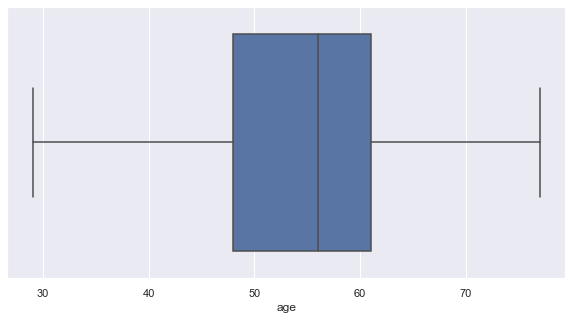

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x=hd_train["age"])

This first box plot shows us the distribution of age in the dataset.
- mean is ~57
- 50% of the participants are betwee ~48 to ~61


Here we calculate and visulaize the 1.5*IQR for each nominal value, as well as show the number of values that are potential outliers. The boxplots are made for each healthy and disease hearts independendly, showing the distribution of each sub-category.

,lower,upper,out of range values
age,28.5,80.5,0
resting_blood_pressure,90.0,170.0,6
cholesterol,113.375,376.375,5
max_heart_rate_achieved,87.25,213.25,1
ST_depression_induced_by_exercise,-2.4,4.0,4


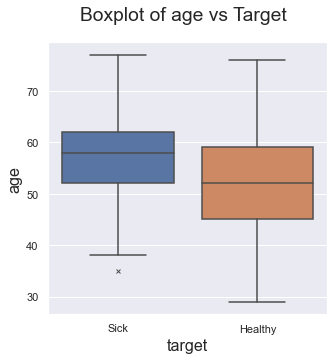

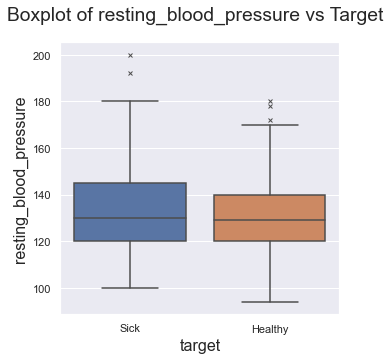

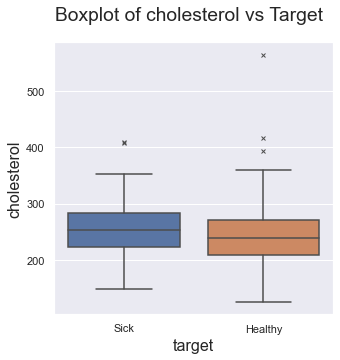

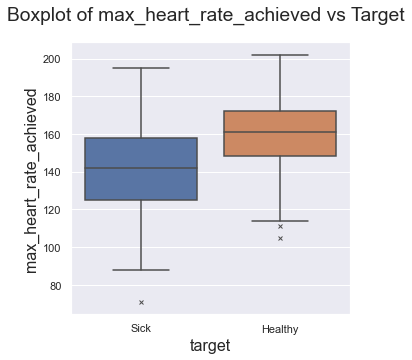

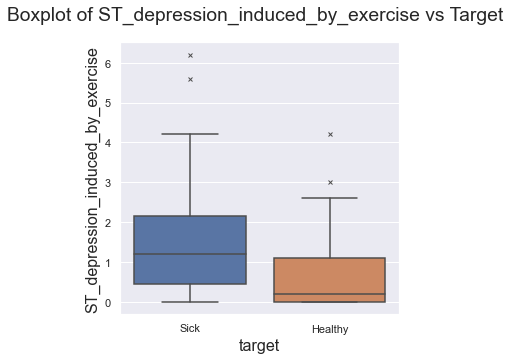

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})

# Initialize dataframe for IQR*1.5 values
IQR_df = pd.DataFrame(index=['age'],
                          columns=['lower', 'upper','out of range values'])


for i in integerAttributesKey:
    #Note: here we assign the plots to a variable to suppress unwanted seaborn text in the output
    plot = plt.figure(i)
    plot_data = sns.boxplot(x="target", y=i, data=hd_train, orient="v", palette="deep", flierprops = dict(marker="x", markersize = 4))
    plot_subtitle = plt.suptitle(f"Boxplot of {i} vs Target")

    # Print IQR and ceiling floor values
    Q1 = hd_train[i].quantile(0.25)
    Q3 = hd_train[i].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR
    number_of_outliers = hd_train[i][(hd_train[i] < low_outliers) | (hd_train[i] > upper_outliers)].count()

    IQR_df.loc[i,:] = [low_outliers, upper_outliers, number_of_outliers]

IQR_df

### Outlier Decision
Based on these results, there are not many outlier values. Given the box plot visualizations, the majority of outliers are not deemed to be noise and will not be removed from the dataset.

One value in cholesterol is far outside the normal distribution of the data. This value will be removed from the training set be setting the upper limit for cholesterol to 2 times the upper IQR (409.25). This approach makes it possible to apply training data knowledge to all new incoming test data without data leakage.

This is where our SME input and context becomes essential. Without their input, we can be making signficant bad choices in how we are treating our data.

We can also see a potential that:
- age seems correlated with heart disease
- higher max heart rate is associated to individuals without heart diseases
- cholesterol doesn't have a significant impact
- when a participant had ST depression that is seen after exercise, they were more likely to suffer from heart disease

In [ ]:
Q1 = hd_train["cholesterol"].quantile(0.25)
Q3 = hd_train["cholesterol"].quantile(0.75)
IQR = Q3 - Q1
max_cholesterol = Q3 + 2 * IQR
max_cholesterol
hd_train = hd_train[hd_train["cholesterol"]<max_cholesterol]

409.25

# Visualizations
We can take a look at some visualizations to see what interesting trends or hypothesis we can test. This will also give us an idea of which models we might want to test and which attributes we expect to have the most impact on our target.

From looking at the boxplots, we also know that our data is in different ranges and we will need to consider applying a normalization depending on the model we choose. We will do that later once we know which models we will try to run. The boxplots also show the categorical variables that were label encoded. Resting blood pressure appears right skewed, and max heart rate achieved appears left skewed. Although this skew would not impact tree-based models, we will transform the data to make sure it works well for any model we apply.

Here we functionally go through our data to plot each numercial value as a histogram, and each categorical data as a count plot.

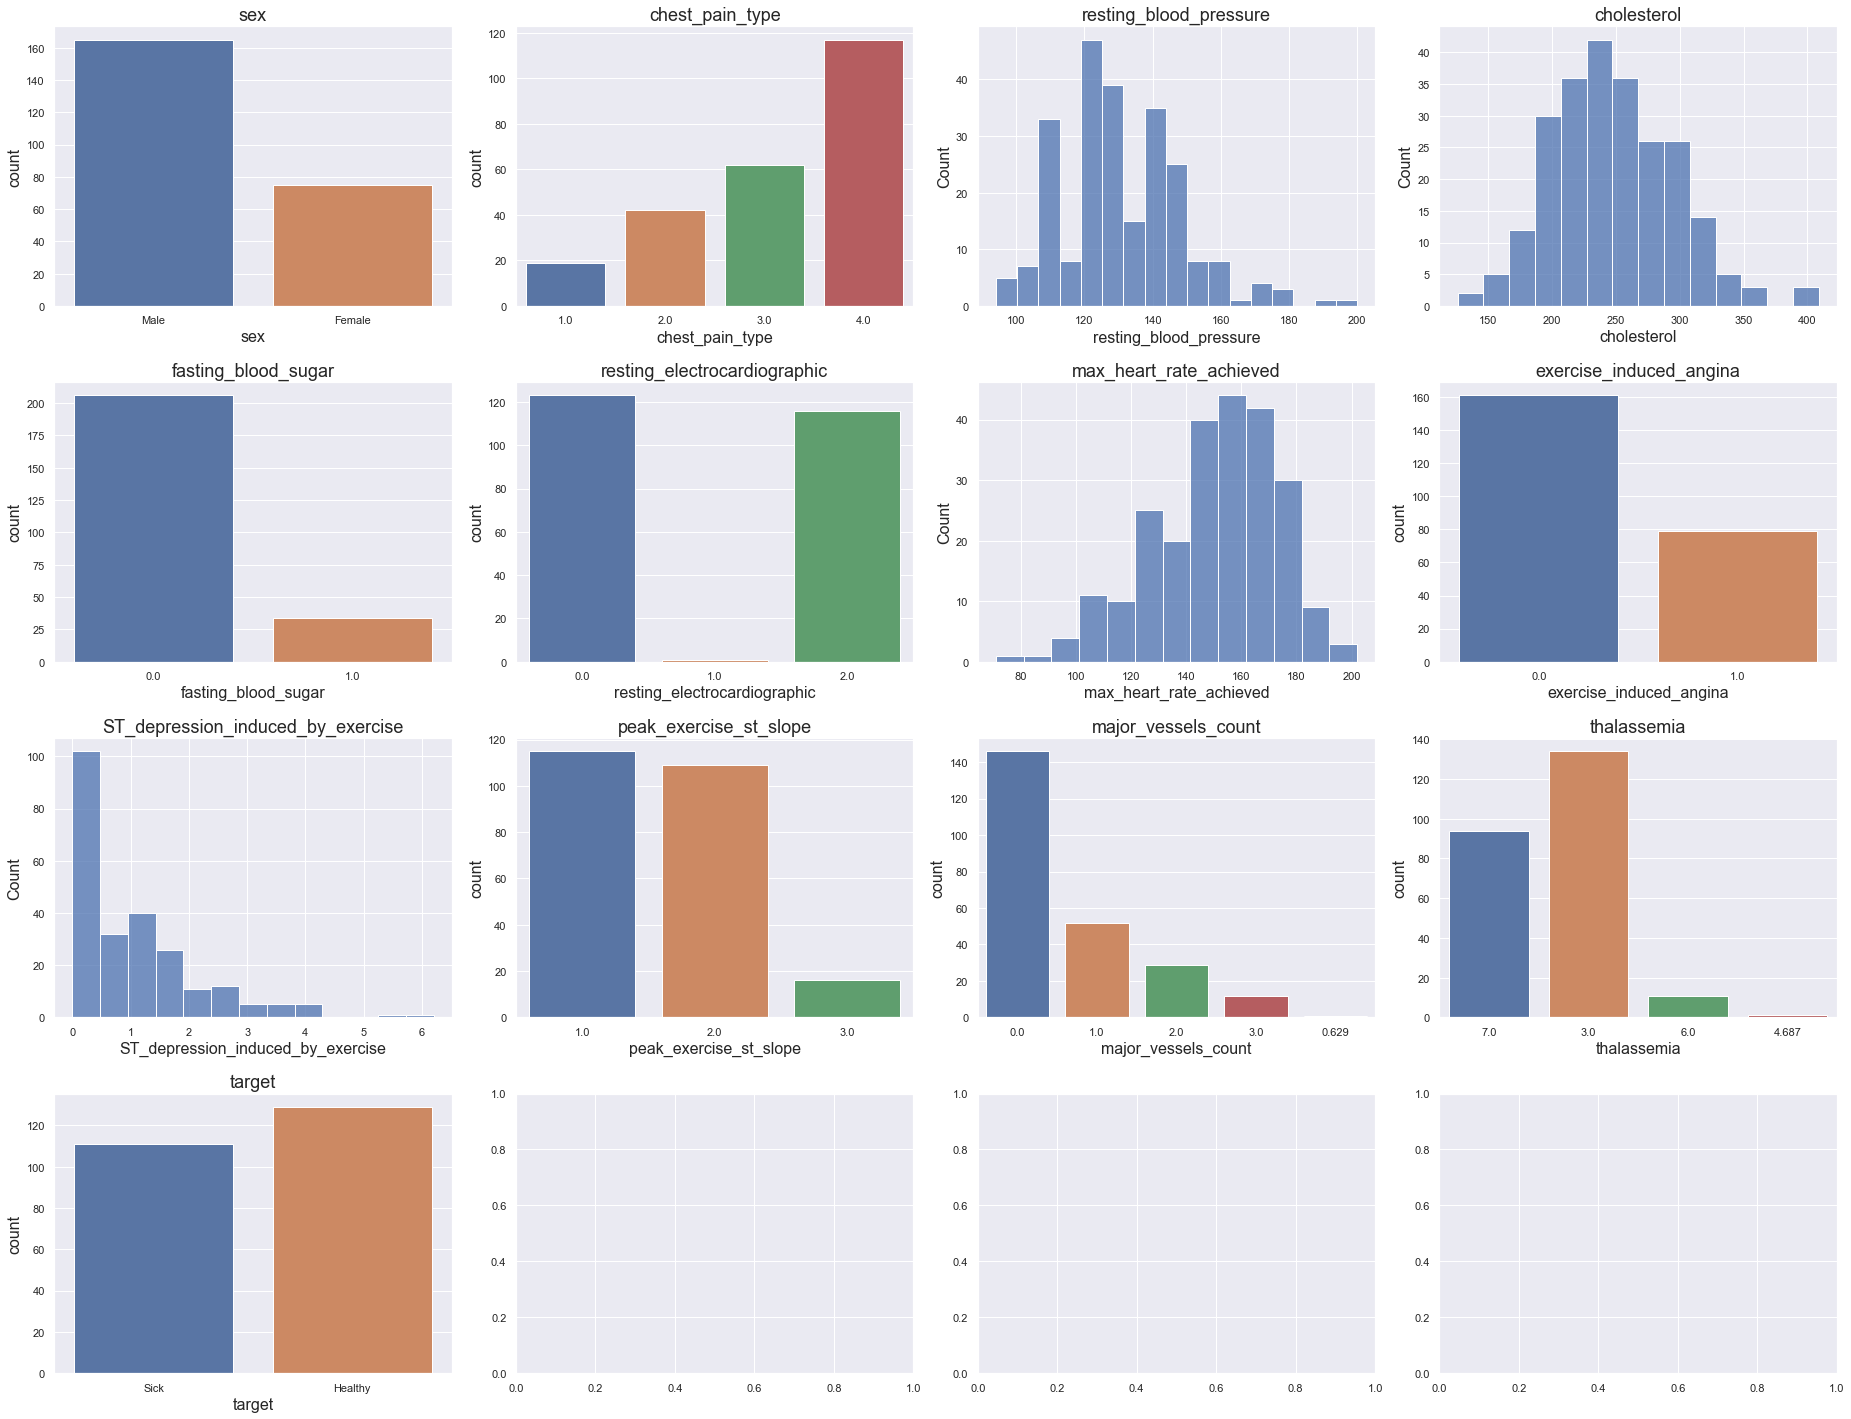

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(26,20))

for index, columnName in enumerate(hd_train.columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

## Fixing Skewed Data

The majority of ML algorithms are built assuming ideal data conditions (such as a statistically perfect standard distribution curve).

Our plots above are shwoing clear skew in our data that we will now fix. We use the `.skew()` function to show the skew on all the numerical features. 

In [ ]:
# determine index for continuous variables
numerical_features = hd_train.dtypes[hd_train.dtypes!='object'].index
# calculate skew and sort
skewed_features = hd_train[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

,Skew
ST_depression_induced_by_exercise,1.466493
resting_blood_pressure,0.724662
cholesterol,0.411143
age,-0.161032
max_heart_rate_achieved,-0.565126


Resting blood pressure appears right skewed, and max heart rate achieved appears left skewed. Although this skew would not impact tree-based models, we will apply a transformation (square root, inverse, and square) on the skewed data to prep it for other models.

In [ ]:
hd_train["max_heart_rate_achieved"] = hd_train["max_heart_rate_achieved"]**2
hd_train["resting_blood_pressure"] = 1/hd_train["resting_blood_pressure"]
hd_train["cholesterol"] = hd_train["cholesterol"]**0.5

In [ ]:
skewed_features = hd_train[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

,Skew
ST_depression_induced_by_exercise,1.466493
cholesterol,0.098258
resting_blood_pressure,0.071072
age,-0.161032
max_heart_rate_achieved,-0.174883


Transforming the data scale using a square for the left skewed data, a square root on the right skewed data and an inverse on the more significantly right skewed data looks to have improved the distribution. We can confirm this visually as well by calling the histogram's again.

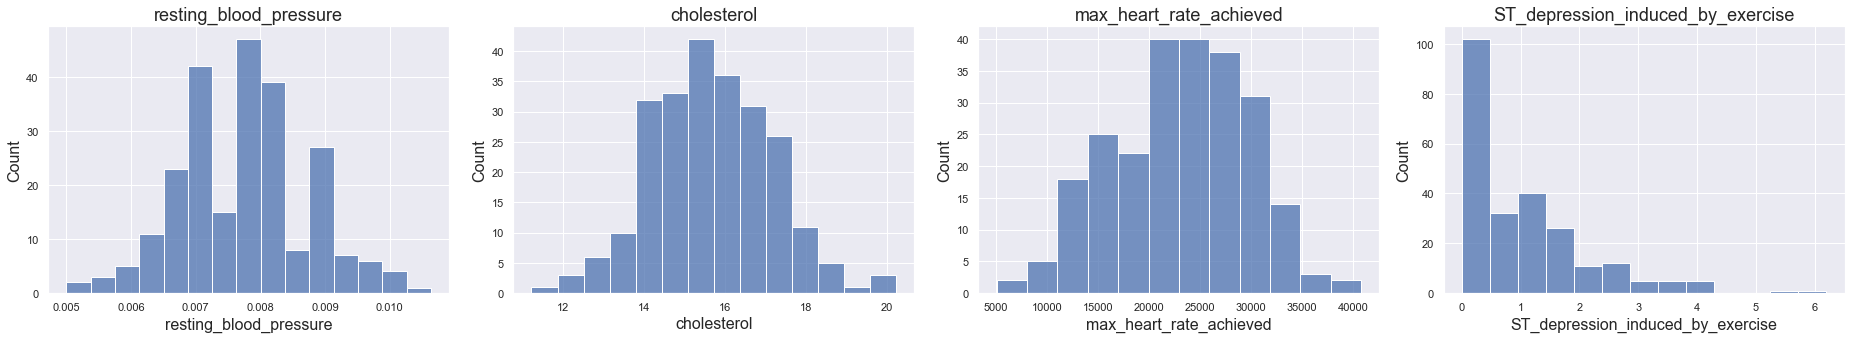

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(26,5))

for index, columnName in enumerate(hd_train[numerical_features].columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

The `ST_depresson_induced_by_exercise` value didn't improve with transformations, so we will explore it more deeply to understand what is going on with the large skew and high number of "0" values.

## EDA Visualizations
We'll generate scatterplots and histograms to continue analyzing our numerical data.

These pairwise plots map our chosen parameters against each other, making it possible to see correlations between features.

In [ ]:
sns.set(rc = {'figure.figsize':(8,8)})

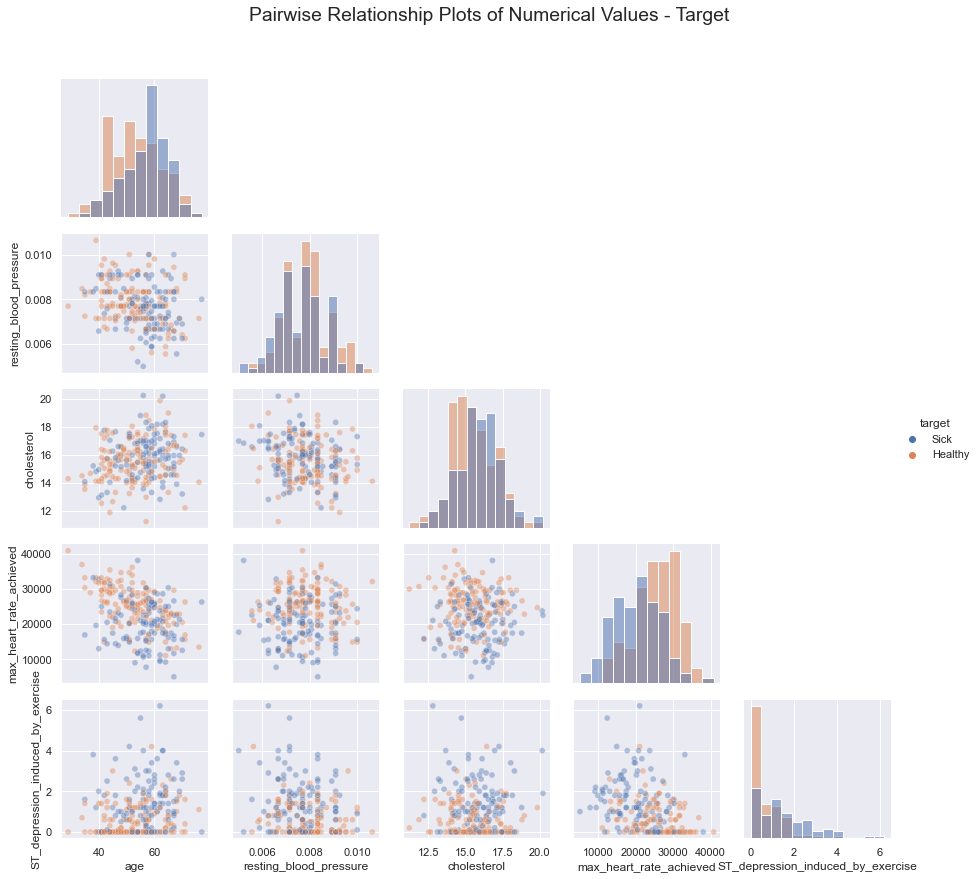

In [ ]:
sns.set_context(rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12,})
#Note: sns calls are saved to variables again to suppress unwanted text in output cell
pairwise_viz = sns.PairGrid(hd_train, vars=integerAttributesKey, hue="target", diag_sharey=False, corner=True)
pairwise_lower = pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_diag = pairwise_viz.map_diag(sns.histplot)
pairwise_legend = pairwise_viz.add_legend()
pairwise_adj = pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_subtitle = pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Target")

### Resting Blood Pressure: Binning
It looks like there is a bit of a "binning" of data for the resting blood pressure. This may be a result of different methods of collecting blood pressure that resulted in a some jumps between values due to the level of precision of the measurements. We won't treat the data for this property. It should continue being treated as a numerical ordered value. This can be considered a normal distribution (recall the skew value of 0.071072)

### ST Depression Induced by Exercise: "0" value and skew
The plots above show there are lots of individuals that had no ST depression induced by exercise (value of 0). We can explore to see if there is an issue in the data, and see the impact this attribute has on the target. This may be a good attribute to use for clustering individuals for a final predictive model.

<AxesSubplot:xlabel='ST_depression_induced_by_exercise', ylabel='Count'>

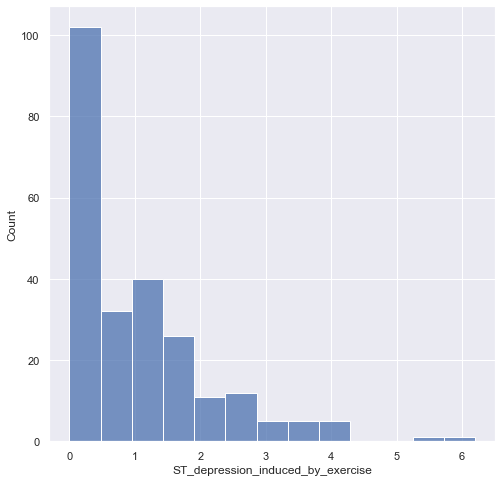

In [ ]:
sns.histplot(x="ST_depression_induced_by_exercise",data=hd_train)

Based on research for what `ST_depression_induced_by_exercise` is, we find that it is a measure of change in an ECG reading after exercise. Subjects with a "0" are subjects that did not have any ST depression, where subjects with a non-zero value had some ST depression present. Thus, the "0" values will not be removed and will be considered correct. 

### ST Depression Induced by Exercise: sub-categorization
I'm interested to see how `ST_depression_induced_by_exercise` impacts the sub-categories of females vs males with healthy vs diseased hearts. This breakdown by gender aligns with the data, as well as our cultural constructures of male vs female health. This breakdown introduces the assumption that heat diseaes impacts males and females differently.

Although our data supports this, we should be careful not to settle into one perspective of our data. Remember, our data is only showing a slice of the real world, and only based on the data we collected.

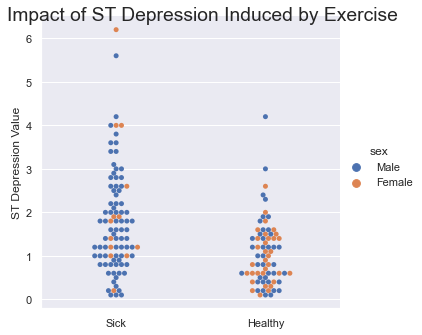

In [ ]:
plot = sns.catplot(x="target", y="ST_depression_induced_by_exercise", kind="swarm", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] != 0])
labels = plot.set(ylabel="ST Depression Value", xlabel="")
plot_subtitle = plt.suptitle(f"Impact of ST Depression Induced by Exercise")

It looks like non-zero levels of `ST_depression_induced_by_exercise` are more prevalent in males, and those that have higher values (above ~2.5) have a greater tendency to have heart disease. We can also see that males with zero values have a greater chance of heart disease. 

<AxesSubplot:xlabel='target', ylabel='count'>

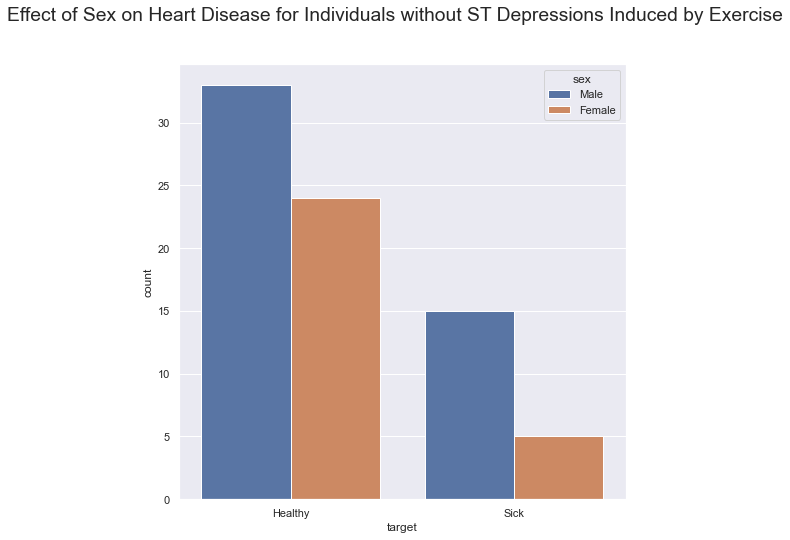

In [ ]:
sns.countplot(x="target", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] == 0.0])
plot_subtitle = plt.suptitle(f"Effect of Sex on Heart Disease for Individuals without ST Depressions Induced by Exercise")

### Drawing Incorrect Conclusions 
This visualization is showing that being a male seems to have an impact on having heart disease if there is no `ST_Depression_by_Exercise`.

**Or does it??**

The graph is a count plot. We checked earlier that we have an imbalanced data set, with more males than females. Naturally, we SHOULD see fewer females in each category. Having females lower in both the healthy and sick category was a giveaway something was wrong.

This imbalance in gender could be because the population we are modelling truly has more males with heart disease, or it could be because the study itself was biased towards including male participants.

At this point, we need to consider balancing our stratification for both healthy/sick AND male/female. This would result in each of our datasets (training and testing) having the same ratio of 
- male with ST
- male without ST
- femaile with ST
- female without ST

### ST Depression Induced by Exercise: Potential Steps

Let's come back to the `ST_depression_induced_by_exercise` data for a second. We identified that it **is** correct (i.e. the zeros aren't a mistake), but we did not do any additional treatment of data. Some options for further processing include:
- Encode the feature as categorical, using hot encoding for "no ST depression" (0) vs "some ST depression" (1,2,3,4,5,6).
- Combine the above one hot encoding above, with ordinal encoding of the values for individuals that do have "some ST depression" include an ordinal 
- correct for data skew after seperating out the "no ST depression" values

It could be interesting to come back and bin the data into a "yes/no" categorical for use in model building.

We leave both the data balancing and feature treatment as a point of future exploration we can come back to for improvements.

### Impact of Age and Sex on Heart Disease
Now, let's continue by taking a look to see what the impact of sex and age is on heart disease is.

From what I know, I'm expecting males and older people have more heart disease. Let's see if the data agrees.

<AxesSubplot:xlabel='target', ylabel='Density'>

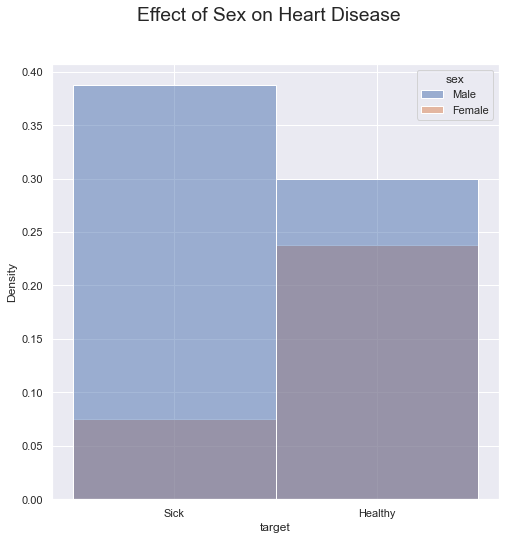

In [ ]:
sns.histplot(x="target", stat="density", hue="sex", data=hd_train)
plot_subtitle = plt.suptitle(f"Effect of Sex on Heart Disease")

The use of density instead of count for the y-axis is much more appropriate, as we can now compare the proportion of each sex within the sub-category of sick and healthy, as well as the two proportions to each other.

Each value is representing a proportion of the whole dataset.

<AxesSubplot:xlabel='age', ylabel='Count'>

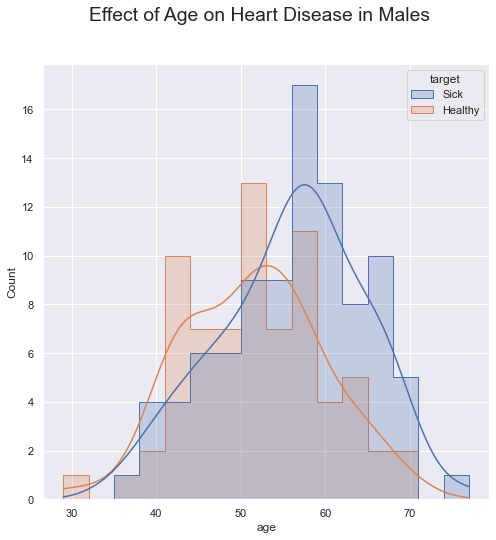

In [ ]:
sns.histplot(hd_train[hd_train["sex"] == "Male"], x="age", hue="target", element="step", kde=True, binwidth=3)
plot_subtitle = plt.suptitle(f"Effect of Age on Heart Disease in Males")

<AxesSubplot:xlabel='age', ylabel='Count'>

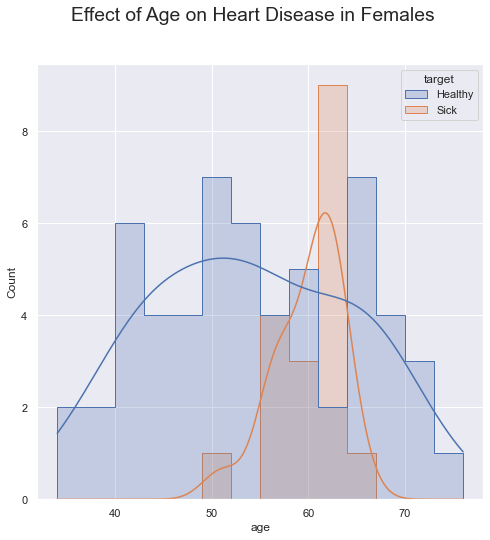

In [ ]:
sns.histplot(hd_train[hd_train["sex"] == "Female"], x="age", hue="target", element="step", kde=True, binwidth=3)
plot_subtitle = plt.suptitle(f"Effect of Age on Heart Disease in Females")

Another way to visualize age against heart disease in men and women. Here we see the distribution of age in the study against the number of healthy and sick individuals.

The distribution of data for healthy females is non-standard, and quite different from that in men. We need to explore that further to see if its a statistical signficance or not. 

It looks like our data is generally showing that males are more likely to have heart disease than females. Males with an average age of ~58 (peak) and females with an average age of ~63 (peak) are more prone to heart disease. 

It's important to note that this is a relatively small (tiny) dataset, making it difficult to draw conclusions with confidence. This data exploration so far would drive further experiment design to test conclusions where there is uncertainty over signficiance. 

***TIP:*** *Have you noticed I started using the term "sick"? That was never in the data. It was just easier than saying "people with heart disease". We also didn't give the target a great name, just leaving it as "target". This could prove to be confusing with stakeholders that are brought in without as much project context.*

### Males vs Females: Anything Else?
When we take a look to see if there are any other interesting differences between males and females with the pairwise functions below, nothing jumps out immediately for further exploration.

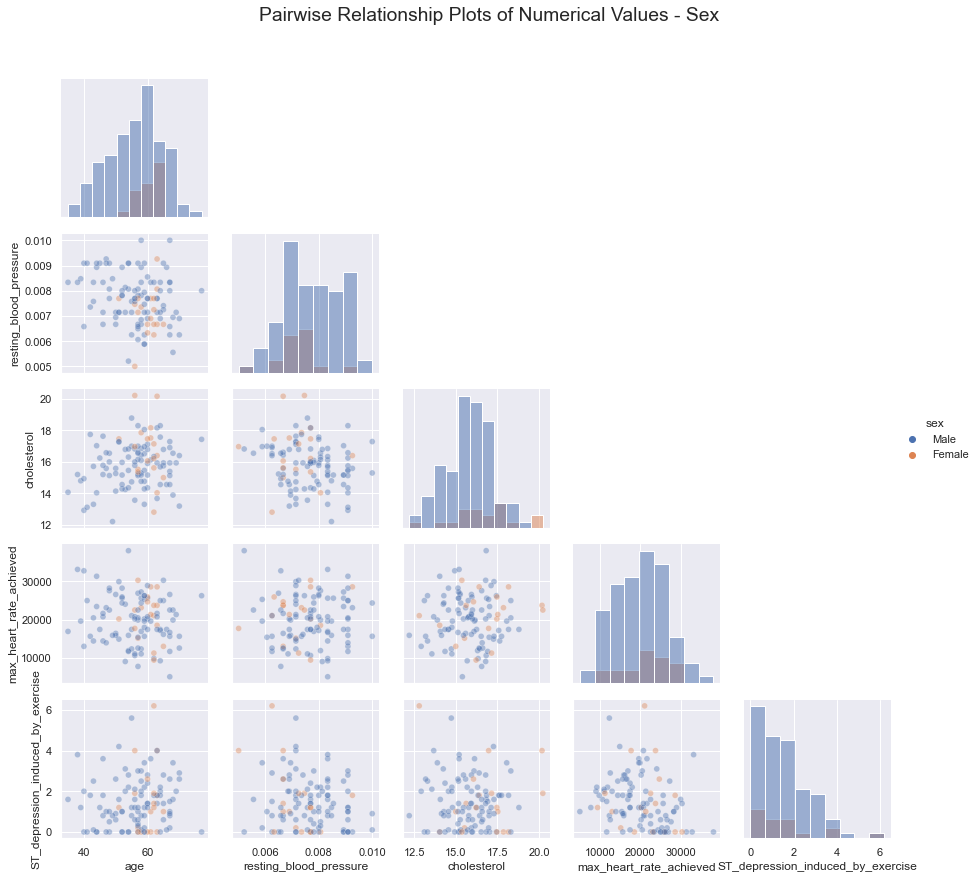

In [ ]:
pairwise_viz = sns.PairGrid(hd_train[hd_train["target"]=="Sick"], vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
pairwise_lower = pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_diag = pairwise_viz.map_diag(sns.histplot)
pairwise_legend = pairwise_viz.add_legend()
pairwise_adj = pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_subtitle = pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Sex")

We don't see anything that immedietly pops out for investigation. We are going to come out of the gender exploration and look at the male/female data together again to see if we can draw conclusions that are representative of the whole population.

<AxesSubplot:xlabel='age', ylabel='Count'>

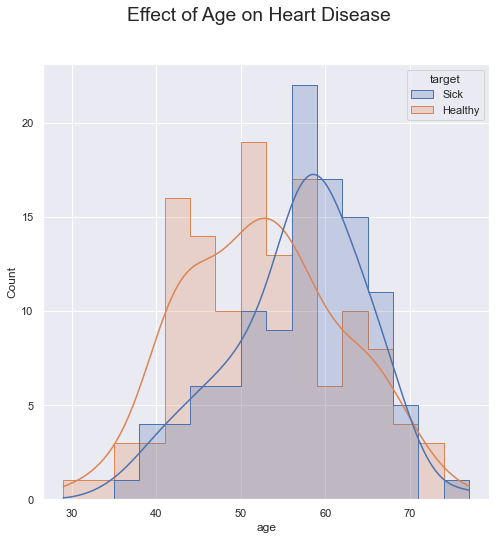

In [ ]:
sns.histplot(hd_train, x="age", hue="target", element="step", kde=True, binwidth=3)
plot_subtitle = plt.suptitle(f"Effect of Age on Heart Disease")

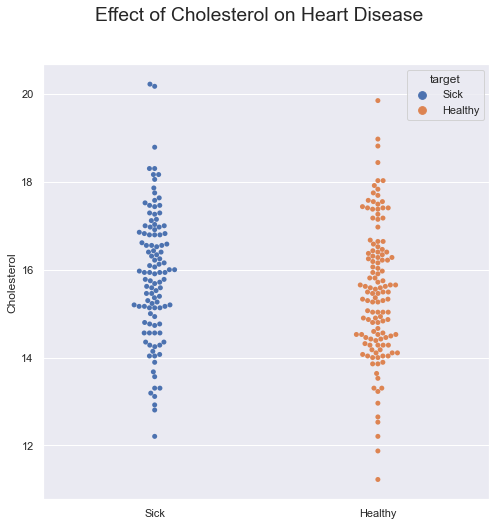

In [ ]:
plot = sns.swarmplot(data=hd_train, x="target", y="cholesterol", hue="target")
labels = plot.set(ylabel="Cholesterol", xlabel="")
plot_subtitle = plt.suptitle(f"Effect of Cholesterol on Heart Disease")

The distributions for cholestoral for sick and healthy appears similar, potntially shifted. With the current information, we could justify doing a deeper dive into these types of features to test for statistical significance using a student t-test.

We are going to leave things at the current depth and continue moving forward to model building. Once we get through a couple runs, we can come back to the pre-rpocessing to identify what we might want to change and test.

## When are we done EDA?

The EDA process can continue to be refined with new questinos about the data being put forth and tested, almost indefinitely. 

An ideal scenario after EDA and model building would be to design additional data measurements that can be used to improve system understanding and model performance.

# Feature Selection

We are building a model of the world around us through data.

The best model is the one that can describe the system in as simple a way as possible. This means we only want to select the "right" data to be used for model training. Including un-correlated features (for example the day of the week patients were tested), introduces noise that makes our model less robust and predicatable when deployed in the real world.

We will combine our insight from the EDA and calculate the amount of corrleation a feature has with a target.

This will help us determine which attributes we should consider keeping for predictions so that our linear models do not suffer from a collinearity issue.
#TODO: Explain collinearity

<Figure size 1008x576 with 0 Axes>

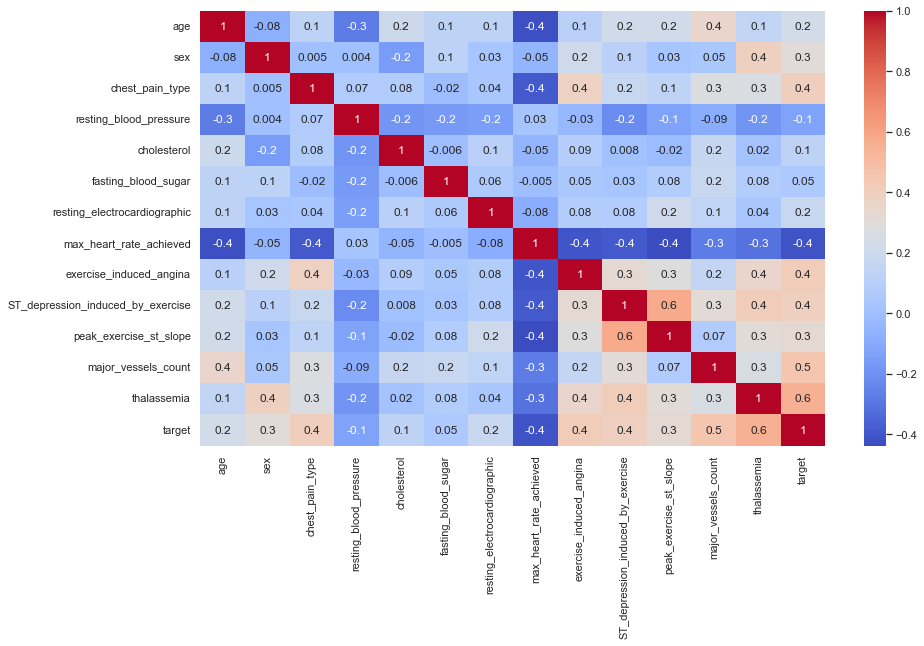

In [ ]:
hd_train["target"] = hd_train["target"].replace(["Healthy", "Sick"],[0,1])
hd_train["sex"] = hd_train["sex"].replace(["Female", "Male"],[0,1])
hd_train = hd_train[hd_train["major_vessels_count"]!="?"]
hd_train = hd_train[hd_train["thalassemia"]!="?"]
hd_train = hd_train.apply(pd.to_numeric)

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd_train.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

The matrix above shows correlations between features. There are different ways to calcualte this where the context of data will help choose the correct method to calculate.

Looking at the target and ST depression column, we see that:
- thalassemia looks to be well correlated with the target (0.6)
- ST depression is correlated with peak exercise at ST slope (0.6)

A correlation of 1 is correlated, -1 is inversly correlated, and 0 is not correlated. Highly correlated features might share some implicit aspect that is not being measured directly. Includeing these features is like including the same "hidden" feature multiple times. The model can become biased towards this hidden feature. On the other hand, barely correlated features can introduce unrelevant noise in the data. 

The cutoff for high correlation in academic literature is between 0.6-0.9. Based on this, there is no strong case to remove any of the features.

We could consider removing:
- fasting blood sugar (0.05)
- cholesterol (0.1)
- resting blood pressure  (-0.1)

The low correlation from these features may be introducing noise in the predictions.

Initial data exploration comparing numerical data against sex and the target category showed these trends:
- age seems correlated with heart disease, especially with men
- higher max heart rate is associated with individuals without heart diseases
- cholesterol doesn't have a significant impact on heart disease
- when a participant had ST depression that is seen after exercise, they were more likely to suffer from heart disease.

For model testing, we will compare datasets where `fasting_blood_sugar`, `cholesterol` and `resting_blood_pressure` are removed to compare performance. These attributes do not show strong direct correlation to the target and may be introducing some noise in the predictions.

# Predictive Models

## Processing Functions
Before we start building our ML models, we define some functions that we'll use to process our data based on the insights from the EDA we did. This approach protects against data leakage, ensures we are treating our training and test data sets consistently, and results in cleaner code and execution during spring iterations.

It also serves as a clear way to communicate all our processing steps.

Regardless of decisions we make for running our model (like excluding some features), its best practice to keep a workflow of all processing steps so that we can choose to include features on the fly without revisiting the entire workflow.

In [ ]:
def outliers_removal(training_dataset):
    """
    Function removes rows with missing values and outliers in cholestoral. This function should only be called on the training dataset.
    :param training_dataset: dataframe that will be used for training
    :return: datafram with missing values and outliers removed
    """
    training_dataset = training_dataset[training_dataset["cholesterol"]<450]
    return training_dataset

def impute_values(dataset):
    """
    Function imputes thalassemia and major vesseles counts based on the mean in the training data. This function should only be called on the training dataset.
    :param training_dataset: dataframe that will be used for training
    :return: datafram with "?" values imputed.
    """
    dataset.loc[dataset["thalassemia"] == "?", "thalassemia"] = float(4.687)
    dataset.loc[dataset["major_vessels_count"] == "?", "major_vessels_count"] = float(0.629)
    return dataset

def transformation(dataset):
    """
    Function adjusts skewness in max heart rate, resting blood pressure, and cholesterol data
    :param dataset: dataframe that will be used for training or in prediction on data
    :return: dataframe with adjusted data
    """
    dataset["max_heart_rate_achieved"] = dataset["max_heart_rate_achieved"]**2
    dataset["resting_blood_pressure"] = 1/dataset["resting_blood_pressure"]
    dataset["cholesterol"] = dataset["cholesterol"]**0.5
    return dataset

def one_hot_encode(dataset):
    #categorical data
    categorical_cols = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
    dataset = pd.get_dummies(dataset, columns = categorical_cols)
    return dataset

The functions we created will remove outliers, impute values, transform skewed data, and encode our categorical data.

As we make improvements to our EDA, including the changes in the functional calls  applies them to the data set being used for training. 

In [ ]:
### IMPORT TRAINING DATA
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd = outliers_removal(hdd)
hdd = impute_values(hdd)
hdd = transformation(hdd)
hdd = one_hot_encode(hdd)

## Test, Train, Validation Split

Here we load a fresh version of the training data we created earlier, and apply all of our pre-processing steps. We need to prepare our training data so the the ML algorithm can use it to learn. This means training the model on a smaller subset of data, and then testing it against new, unseen data.

Remember, we already did our first split to keep our *validation* data unseen. Now we need to do something similar again for model *testing*.`

Ee first did a split to carve out our validation data like this:
1. 80/20 Split 1 (during EDA)
- `hd_train`: data used for exploration, pre-processing design, feature engineering and feature selection. ***80% of data. 242 samples.***
- `hd_test`: data used or validation. The data remains untouched and unseen. ***20% of data. 61 samples***

This validation split was also stratified on the target feature to make sure the number of samples in both the test and training datasets is representative of the whole. The testing and training dataset respectively had 45.9% and 45.8% samples with heart disease present and were both representative.

After completing our model building and design, we use only our `hd_train` data for model training. We will either treat this data with another 80/20 test/train split, or use k-fold cross validation.
- 80/20 Split 2 (ML Training)
    - `X_train` and `y_train`: data used to train the model
    - `X_test` and `y_test`: data used to test our trained model
- k-fold cross validation (ML Training)
    - `X` and `y`: used 5-fold and 10-fold cross validation.

In the end, we have a training, testing and validation subset of data. `hd_test` will only be used for validation

This means we have data leakage between the testing and training dataset used for the ML training. This is a known and controlled data leakage. The consequences are will be seen when our model performs better in testing than validation.

### Validation Protocol Choice: Train/Test/Validation Split with k-Fold cross-validation
Given the limited sample size, cross-validation was chosen as the final validation method. This provided more robust accuracy measures as each test/train split was completed multiple times and an average accuracy was provided as a result metric.

For logistic regression and decision tree models, a 10-fold cross-validation was used as it provided a good balance between computation time and accuracy. 

Given the relatively small size of the training data set a smaller test instance was not deemed reasonable as it would result in many similar iterations training the model. 

A 5-fold cross validation was used for random forest and neural network, driven primarily by computation time.
- Test/train split validation: 48 test, 194 train (single model validation)
- 5-fold cross validation: 48 test, 194 train (average of 5 models validation)
- 10-fold cross validation: 24 test, 218 train (average of 10 models validation)


In [ ]:
columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [10]]
X = hdd.iloc[:,columns_to_keep]
y = hdd.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection and building

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values.ravel()

Here we apply transformations and scaling from our EDA training data. At a computer level, it means we transform our numerical values to all be integers between 0 and 1. Depending on the validation data, this means some features in our unseen data may be scaled "too big" or "too small" relative to what we saw in our training set.

If validation data is consistent data, there wont be issues. If we see changes in the data occuring slowly over time (data drift) we will see that our model performs incressingly badly, with behaviour improving by retraining transformations on the now larger dataset.

# Saving Model Result

In [ ]:
results_df = pd.DataFrame(index=['Decision Tree (Default)'],
                          columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy (cv)'])

# Model Building Process
For each model being built, we will start by building a model:
1. using default parameters
2. expanded with cross fold validation
3. apply hyper tuning

All the results are stored to the `results_df` dataframe for comparison. The same approach will be followed for each model. 

We will use the following parameters to evalute the models:
1. precision (how often a true positive prediction is actually positive)
2. recall (how often a true positive prediction occurs given all positives)
3. accuracy (how often the model correctly predicts positive and negative  outcomes)
4. f-score (a balance of precision and recall)

We can also test against a baseline of some sort. This can be a naive predictor that is used to randomly guess the values, without any a-priori information.

Models that require more computation time for hyper tuning (e.g. random forest and neural net) will start by using a random search to approximate the best parameters, followed by a full grid search to refine them.

Any of the models using cross fold validation will use the full training data set (X, y), while models without cross fold will use the test/train split datasets (X_train, X_test, y_train, y_test)

# Decision Tree Model Building
## DT - Test Train Split Validation

In [2]:
#without hyperparameter tuning
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_fit = dt.fit(X_train,y_train)

#Predict the response for test dataset
dt_predict = dt_fit.predict(X_test)

results_df.loc['Decision Tree (Default)',:] = [f1_score(y_test,dt_predict, average='macro'), precision_score(y_test,dt_predict), recall_score(y_test,dt_predict),accuracy_score(y_test,dt_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)


NameError: name 'DecisionTreeClassifier' is not defined

In this first model, a decision tree, we first create a decision tree model object called `dt`.

We train the model on the `X_train` and `y_train` data, predict an outcome using `X_Test`, and then compare the outcome to actual values in `y_test`.

The model performance results are then saved for comparison.

### DT - Cross Validation

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
dt = DecisionTreeClassifier()
cross_val_results = pd.DataFrame(cross_validate(dt, X, y, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


Here we build the same model, but we now use 10-fold cross-validation. This means we will seperate our data into 10 chunks, and use the first 9 chunks to train, and the 10th to test. We do this 9 times with each combination of test data and take an average of the results.

## DT - hyperparameter tuning + cross validation
### Using RandomizedSearchCV

We can improve model training time by testing a smaller subset of models using a fixed number of randomzed parameters. A fixed number of hyperparameters are sampled from probability distribution we choose. The following hyperparameter are chosen for tuning:

"max_depth":[3,None]
max_depth: The maximum depth of the tree. A higher value of maximum depth can cause overfitting, and a lower value can cause underfitting. We set that at 3 to none.
"min_samples_leaf":randint(1,20)
min_samples_leaf: The minimum number of samples required to be at a leaf node. We set random value to be chosen from 1 to 20.
"criterion":["gini","entropy"]
criterion: The function to measure the quality of a split. We set both gini and entropy to choose the best one for this decision tree model.

In [ ]:
#paramters setup for tuning
param={"max_depth":[3,None],"min_samples_leaf":randint(1,20),"criterion":["gini","entropy"]}

#instatiate decision tree classifier
clf = DecisionTreeClassifier()

#instatiate RandomizedSearchCV
clf_cv=RandomizedSearchCV(clf,param,cv=10)

#fitting the model
clf_cv.fit(X_train,y_train)

cross_val_results = pd.DataFrame(cross_validate(clf_cv.best_estimator_ , X, y, cv = 10, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fac79c00430>})

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


There is an improvement between the hyper-parameter tuned model and that without tuning. It also looks like the model performs worse using cross-validation.

# Logistic Regression Model Building
### LR - Test Train Split Validation

In [ ]:
# Training the Logistic Regression model on the Training set
lr = LogisticRegression(random_state=42)
lr_fit = lr.fit(X_train, y_train)
# Predicting the Test set results
lr_predict = lr_fit.predict(X_test)

results_df.loc['Logistic Regression (Default)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


### LR - Cross Validation

In [ ]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lr = LogisticRegression()

cross_val_results = pd.DataFrame(cross_validate(lr, X, y, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


### LR - hyperparameter tuning + cross validation
Here, we are using grid searching for parameter tuning.
The following hyperparameter are chosen for tuning: 
- solver[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]. There are five solver used in sklearn. Each solver uses to find the parameter weights that minimize the cost function.
- penalty[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]. Regularization addresses the problem of over-fitting by penalizing the parameters.
- We set the four penalties. C [100, 10, 1.0, 0.1, 0.01]
- The C parameter controls the penalty strength, which can also be effective.
- max_iteration [20, 50, 100, 200, 500, 1000]

We set some random values in max_iteration to find out which iteration will be best for the solver to converge.

In [ ]:
# define models and parameters
lr = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [20, 50, 100, 200, 500, 1000, 2000, 5000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

lr_grid = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr_grid_fit = lr_grid.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(lr_grid.best_estimator_, X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/s

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


We see here that the logistic regression cross validation and hyper parameter tuning are performing well togeher.

In [ ]:
lr_grid.best_params_

{'C': 100, 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}

# Random Forest
### RF - Test Train Split Validation

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)
rf_fit = rf.fit(X_train, y_train)
# Predicting the Test set results
rf_predict = rf_fit.predict(X_test)

results_df.loc['Random Forest (Default)',:] = [f1_score(y_test,rf_predict, average='macro'), precision_score(y_test,rf_predict), recall_score(y_test,rf_predict),accuracy_score(y_test,rf_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


### RF - Cross Validation

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)

cross_val_results = pd.DataFrame(cross_validate(rf, X, y, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

In [ ]:
results_df.loc['Random Forest (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


### RF - hyperparameter tuning + cross validation
#### using RandomixedSearchCV
We can start hypertuning by using a randomized parameter search to get an idea of the right parameters. We will then use the correct range of parameters on a full parameter grid search

In [ ]:
rf = RandomForestClassifier()
n_estimators = [1,5,10,40,100,200,500,1000,2000,5000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,3,5,7,9,11,13,15,20]
criterion= ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1)
rf_random_fit = rf_random.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 5,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [ ]:
cross_val_results = pd.DataFrame(cross_validate(rf_random.best_estimator_ , X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest (Randomized Parameters)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Random Forest (Randomized Parameters),0.766414,0.782268,0.773557,0.776
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


### RF - hyperparameter tuning + cross validation
#### using GridSearchCV

In [ ]:
rf = RandomForestClassifier()
n_estimators = [500,600,800,1000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,2,3,4,5]
criterion= ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_grid = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
rf_grid_fit = rf_grid.fit(X, y)

In [ ]:
coefficients = pd.DataFrame(rf_grid.best_estimator_.feature_importances_).rename(mapper={0:"age", 1:"chest_pain_type", 2:"resting blood pressure", 3:"cholesterol", 4:"resting_electrocardiographic", 5:"max_heart_rate_achieved", 6:"ST_depression_induced_by_exercise", 7:"peak_exercise_st_slope", 8:"major_vessels_count", 9:"thalassemia", 10:"male", 11:"female", 12:"with fasting blood sugar", 13:"without fasting blood sugar", 14:"with_exercise_induced_angina", 15:"without_exercise_induced_angina"}, axis=0).rename(mapper={0:"coefficients"},axis=1)
coefficients

,coefficients
age,0.026419
chest_pain_type,0.150468
resting blood pressure,0.010700
cholesterol,0.012176
resting_electrocardiographic,0.004026
max_heart_rate_achieved,0.087889
ST_depression_induced_by_exercise,0.084614
peak_exercise_st_slope,0.040006
major_vessels_count,0.147505
thalassemia,0.241163


In [ ]:
cross_val_results = pd.DataFrame(cross_validate(rf_grid.best_estimator_ , X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Random Forest (Randomized Parameters),0.766414,0.782268,0.773557,0.776
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.707692,0.717964,0.708021,0.718


# Neural Network Model
### MLP - Simple with Cross Validation

In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=[1],
                           alpha=0,
                           activation='logistic',
                           max_iter=400,
                           solver='lbfgs',random_state=42)

cross_val_results = pd.DataFrame(cross_validate(nnet , X, y, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/adambroniewski/.local/share/virtualen

In [ ]:
results_df.loc['MLP [1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP [1],0.83049,0.840838,0.829462,0.833673
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Random Forest (Randomized Parameters),0.766414,0.782268,0.773557,0.776
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102


### MLP - Deep-Learning with Cross Validation

In [ ]:
# changing the size of hidden layer

nnet_deep = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='logistic',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)

In [ ]:
cross_val_results = pd.DataFrame(cross_validate(nnet_deep , X, y, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP [2,2,2]-alpha=0.001',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP [1],0.83049,0.840838,0.829462,0.833673
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805
"MLP [2,2,2]-alpha=0.001",0.793905,0.803593,0.794345,0.796259
Decision Tree (Default),0.775136,0.75,0.782609,0.77551
Random Forest (Randomized Parameters),0.766414,0.782268,0.773557,0.776


### MLP - Deep Learning with Hyperparameter Tuning + Cross Validation

In [ ]:
# sizes = [2*i for i in range(1,5)]
# sizes = sizes + [[2*i,2*i] for i in range(1,5)]
# sizes = sizes + [[2*i,2*i, 2*i] for i in range(1,5)]

sizes = [2*i for i in range(1,5)]
sizes = sizes + [[1*i,1*i] for i in range(1,5)]
sizes = sizes + [[1*i,1*i, 1*i] for i in range(1,5)]

decays = [3,4,5,6,7,8]

nnet = MLPClassifier(alpha=0,
                     activation='logistic',
                           max_iter=500,
                           solver='lbfgs',
                           random_state=42)

nnet_grid = GridSearchCV(estimator=nnet,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays,},
                   cv=5,
                   return_train_score=True,
                   refit='f1_macro')

nnet_grid_fit = nnet_grid.fit(X, y)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [ ]:
nnet_grid.best_params_
nnet_grid.best_estimator_.n_iter_
nnet_grid.best_estimator_.n_layers_

{'alpha': 4, 'hidden_layer_sizes': 8}

29

3

In [ ]:
cross_val_results = pd.DataFrame(cross_validate(nnet_grid.best_estimator_, X, y, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP (Hyper Parameter Tuning),0.830799,0.838518,0.829462,0.833673
MLP [1],0.83049,0.840838,0.829462,0.833673
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805
"MLP [2,2,2]-alpha=0.001",0.793905,0.803593,0.794345,0.796259
Decision Tree (Default),0.775136,0.75,0.782609,0.77551


# Testing Models with Feature Selection
### Redefine processing functions and import data

In [ ]:
def one_hot_encode_feature_engineer(dataset):
    #categorical data
    categorical_cols = ['sex', 'exercise_induced_angina']
    dataset = pd.get_dummies(dataset, columns = categorical_cols)
    return dataset

def transformation_feature_engineer(dataset):
    """
    Function adjusts skewness in max heart rate and resting blood pressure data
    :param dataset: dataframe that will be used for training or in prediction on data
    :return: dataframe with adjusted data
    """
    dataset["max_heart_rate_achieved"] = dataset["max_heart_rate_achieved"]**2
    return dataset

In [ ]:
### IMPORT TRAINING DATA
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd.drop(columns=["fasting_blood_sugar", "cholesterol", "resting_blood_pressure"], inplace=True)
# Note: we don't call outlier removal as it was only working on cholesterol, which is a column we dropped.
hdd = impute_values(hdd)
hdd = transformation_feature_engineer(hdd)
hdd = one_hot_encode_feature_engineer(hdd)

columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [8]]
X = hdd.iloc[:,columns_to_keep]
y = hdd.iloc[:,8]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values.ravel()

### LR - Feature Selection + Hyper Tuning

In [ ]:
# define models and parameters
lr = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [20, 50, 100, 200, 500, 1000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

lr_grid = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr_grid_fit = lr_grid.fit(X, y)

cross_val_results = pd.DataFrame(cross_validate(lr_grid.best_estimator_, X, y, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - Logistic Regression (HT)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/M

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP (Hyper Parameter Tuning),0.830799,0.838518,0.829462,0.833673
MLP [1],0.83049,0.840838,0.829462,0.833673
FS - Logistic Regression (HT),0.826161,0.836052,0.826011,0.830333
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805
"MLP [2,2,2]-alpha=0.001",0.793905,0.803593,0.794345,0.796259


In [ ]:
lr_grid.best_estimator_

LogisticRegression(C=0.1, max_iter=20, penalty='l1', solver='liblinear')

### MLP - Simple with Feature Selection + Hyper Tuning

In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=[1],
                           alpha=0,
                           activation='logistic',
                           max_iter=400,
                           solver='lbfgs',random_state=42)

cross_val_results = pd.DataFrame(cross_validate(nnet , X, y, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - MLP[1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP (Hyper Parameter Tuning),0.830799,0.838518,0.829462,0.833673
MLP [1],0.83049,0.840838,0.829462,0.833673
FS - Logistic Regression (HT),0.826161,0.836052,0.826011,0.830333
FS - MLP[1],0.823329,0.831223,0.822339,0.826276
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801
Random Forest (Hyper Parameter Tuning),0.795247,0.809506,0.797104,0.805


### MLP - Deep Learning with Feature Selection + Hyper Tune

In [ ]:
sizes = [2*i for i in range(1,4)]
sizes = sizes + [[2*i,2*i] for i in range(1,4)]
sizes = sizes + [[2*i,2*i, 2*i] for i in range(1,4)]

decays = [0.1,0.5,1,2,6,8]

nnet = MLPClassifier(activation='logistic', max_iter=500, solver='lbfgs', random_state=42)

nnet_grid = GridSearchCV(estimator=nnet,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays},
                   cv=5,
                   return_train_score=True,
                   refit='f1_macro')

cross_val_results = pd.DataFrame(cross_validate(nnet_grid , X, y, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - MLP (HT)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
MLP (Hyper Parameter Tuning),0.830799,0.838518,0.829462,0.833673
MLP [1],0.83049,0.840838,0.829462,0.833673
FS - Logistic Regression (HT),0.826161,0.836052,0.826011,0.830333
FS - MLP[1],0.823329,0.831223,0.822339,0.826276
FS - MLP (HT),0.820369,0.826934,0.820462,0.822279
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092
Decision Tree (Hyper Parameter Tuning),0.796903,0.809892,0.797698,0.801


# Final Model Test

In [ ]:
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd.drop(columns=["fasting_blood_sugar", "cholesterol", "resting_blood_pressure"], inplace=True)

hdd = impute_values(hdd)
hdd = transformation_feature_engineer(hdd)
hdd = one_hot_encode_feature_engineer(hdd)

columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [8]]
X_train = hdd.iloc[:,columns_to_keep]
y_train = hdd.iloc[:,8]

In [ ]:
hd_test = pd.read_csv('../data/processed/final_dataset_test', header=0, index_col=0)
hd_test.drop(columns=["fasting_blood_sugar", "cholesterol", "resting_blood_pressure"], inplace=True)

hd_test = impute_values(hd_test)
hd_test = transformation_feature_engineer(hd_test)
hd_test = one_hot_encode_feature_engineer(hd_test)

columns_to_keep = [x for x in range(hd_test.shape[1]) if x not in [8]]
X_test = hd_test.iloc[:,columns_to_keep]
y_test = hd_test.iloc[:,8]

In [ ]:
X_test.shape

(61, 12)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values.ravel()
X_test = scaler.transform(X_test)
y_test = y_test.values.ravel()

# Final Model Training
As the hyper tuned linear regression model performed the best, we will use the parameters from the previously determined model. We will train the model on the entire training dataset this time.

In [ ]:
lr_final_fit = lr.fit(X_train, y_train)

lr_predict = lr_final_fit.predict(X_test)

In [ ]:
results_df.loc['Final Model Test (LR)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Final Model Test (LR),0.836022,0.78125,0.892857,0.836066
MLP (Hyper Parameter Tuning),0.830799,0.838518,0.829462,0.833673
MLP [1],0.83049,0.840838,0.829462,0.833673
FS - Logistic Regression (HT),0.826161,0.836052,0.826011,0.830333
FS - MLP[1],0.823329,0.831223,0.822339,0.826276
FS - MLP (HT),0.820369,0.826934,0.820462,0.822279
Logistic Regression (CV),0.819811,0.828857,0.821744,0.8255
Logistic Regression (Hyper Parameter Tuning),0.819811,0.828857,0.821744,0.8255
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.813403,0.828682,0.812177,0.817092


In [ ]:
results_df.iloc[[-1,-4]]

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Final Model Test (LR),0.836022,0.78125,0.892857,0.836066
FS - Logistic Regression (HT),0.826161,0.836052,0.826011,0.830333


In [ ]:
coefficients = pd.DataFrame(lr_final_fit.coef_, columns=["age", "chest_pain_type", "resting_electrocardiographic", "max_heart_rate_achieved", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "male", "female", "with_exercise_induced_angina", "without_exercise_induced_angina"])
coefficients.transpose().rename(mapper={0:"coefficients"}, axis=1)

,coefficients
age,-0.001929
chest_pain_type,0.502451
resting_electrocardiographic,0.280766
max_heart_rate_achieved,-0.253334
ST_depression_induced_by_exercise,0.229030
peak_exercise_st_slope,0.265598
major_vessels_count,1.029070
thalassemia,0.771282
male,-0.259844
female,0.259844
